<a href="https://colab.research.google.com/github/sheikh-bah/Deep_NN_-_CNN/blob/main/CAT_DOG_KAGGLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [4]:
import os
import zipfile
import random
from shutil import copyfile

In [5]:
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/tmp/cats-and-dogs.zip"

# our zip file
local_zip =  '/tmp/cats-and-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


--2021-03-04 15:17:25--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 104.123.200.136, 2600:1402:6800:282::e59, 2600:1402:6800:281::e59, ...
Connecting to download.microsoft.com (download.microsoft.com)|104.123.200.136|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M   107MB/s    in 7.0s    

2021-03-04 15:17:32 (113 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]



In [6]:
print(len(os.listdir('/tmp/PetImages/Cat/')))
print(len(os.listdir('/tmp/PetImages/Dog/')))

12501
12501


In [7]:
# Create a directory for training and validation
# subdirectories for cat and dogs
try:
    os.mkdir('/tmp/cats-v-dogs')
    os.mkdir('/tmp/cats-v-dogs/training')
    os.mkdir('/tmp/cats-v-dogs/validation')
    os.mkdir('/tmp/cats-v-dogs/training/cats')
    os.mkdir('/tmp/cats-v-dogs/training/dogs')
    os.mkdir('/tmp/cats-v-dogs/validation/cats')
    os.mkdir('/tmp/cats-v-dogs/validation/dogs')
except OSError:
  pass


In [8]:
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
  files = []

  for list_of_data in os.listdir(SOURCE):
    x = SOURCE + list_of_data
    # All images should be checked, and if they have a zero file length,
    # they will not be copied over.
    if os.path.getsize(x) > 0:  # os.path.getsize(PATH) gives you the size of the file.
     files.append(list_of_data)
    else:
       print(list_of_data + ' Zero length, so ignoring')


  Training_data = int(len(files) * SPLIT_SIZE) # a SPLIT SIZE to determine the portion.
  Validation_data = int(len(files) - Training_data)
  # random.sample(list, len(list)) shuffles a list
  Shuffled_data = random.sample(files, len(files))
  training_set = Shuffled_data[0:Training_data]
  validation_set = Shuffled_data[:Validation_data]


  for list_of_data in training_set:
    new_file = SOURCE + list_of_data
    destination = TRAINING + list_of_data
    # copyfile(source, destination) copies a file from source to destination
    copyfile(new_file, destination)

  for list_of_data in validation_set:
    new_file = SOURCE + list_of_data
    destination = VALIDATION + list_of_data
    copyfile(new_file, destination)


In [9]:
Cat_Source_dir = "/tmp/PetImages/Cat/"
training_cats_dir = "/tmp/cats-v-dogs/training/cats/"
validation_cats_dir = "/tmp/cats-v-dogs/validation/cats/"

Dog_Source_dir = "/tmp/PetImages/Dog/"
training_dogs_dir = "/tmp/cats-v-dogs/training/dogs/"
validation_dogs_dir =  "/tmp/cats-v-dogs/validation/dogs/"

split_size = .9

import tensorflow as tf
class CallBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('accuracy') > 0.97):
      print('\nReached a high accuracy, so cancelling training')
      self.model.stop_training = True

Callbacks = CallBack()

In [10]:
split_data(Cat_Source_dir, training_cats_dir, validation_cats_dir, split_size)

666.jpg Zero length, so ignoring


In [11]:
split_data(Dog_Source_dir, training_dogs_dir, validation_dogs_dir, split_size)

11702.jpg Zero length, so ignoring


In [12]:
print("The training data of cats :",len(os.listdir(training_cats_dir )))
print("The validation data of cats :",len(os.listdir(validation_cats_dir)))
print("The training data of dogs :",len(os.listdir(training_dogs_dir)))
print("The validation data of dogs :",len(os.listdir(validation_dogs_dir)))

The training data of cats : 11250
The validation data of cats : 1250
The training data of dogs : 11250
The validation data of dogs : 1250


# We build our model


In [13]:
import tensorflow as tf
from tensorflow import keras


In [14]:
model =tf.keras.models.Sequential([
                                tf.keras.layers.Conv2D(16, (3,3), input_shape=(150, 150, 3),activation = 'relu'),
                                tf.keras.layers.MaxPooling2D(2,2),
                                tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
                                tf.keras.layers.MaxPooling2D(2,2),
                                tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                tf.keras.layers.MaxPooling2D(2,2),
                                tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(512, activation= 'relu'),
                                tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [15]:
from keras.optimizers import RMSprop
model.compile(optimizer= RMSprop(lr = 0.001), loss = 'binary_crossentropy', metrics =['accuracy'])

# Data preprocessing
Set up data generators that will read pictures in our folders,convert them to float32 tensors, and feed them(with their labels) to our network.

We will have one generator for the training and validation images. Our generators will yield batches of images and their labels

In [16]:
from keras.preprocessing.image import ImageDataGenerator

# We rescale our image
# Preprocess by normalizing the pixel values to be in the range [0,1]
training_datagen = ImageDataGenerator(rescale = 1/255)
validation_datagen = ImageDataGenerator(rescale = 1/255)
# Data generator allow us to instantiate generators and their labels
training_generator =training_datagen.flow_from_directory(
    '/tmp/cats-v-dogs/training', 
    target_size = (150,150),
    batch_size = 20,
    class_mode= 'binary'
    )

validation_generator =validation_datagen.flow_from_directory(
    '/tmp/cats-v-dogs/validation',
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)


Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


# Training the model

In [17]:
history = model.fit(
    training_generator, 
    epochs = 15,verbose = 1,
    validation_data = validation_generator
    
)

Epoch 1/15
1125/1125 [==============================] - 563s 500ms/step - loss: 0.6319 - accuracy: 0.6550 - val_loss: 0.4742 - val_accuracy: 0.7804
Epoch 2/15
1125/1125 [==============================] - 560s 498ms/step - loss: 0.4606 - accuracy: 0.7842 - val_loss: 0.3819 - val_accuracy: 0.8232
Epoch 3/15
1125/1125 [==============================] - 558s 496ms/step - loss: 0.3977 - accuracy: 0.8233 - val_loss: 0.3364 - val_accuracy: 0.8644
Epoch 4/15
1125/1125 [==============================] - 552s 491ms/step - loss: 0.3361 - accuracy: 0.8569 - val_loss: 0.2596 - val_accuracy: 0.8996
Epoch 5/15
1125/1125 [==============================] - 552s 490ms/step - loss: 0.3071 - accuracy: 0.8750 - val_loss: 0.2643 - val_accuracy: 0.8936
Epoch 6/15
1125/1125 [==============================] - 552s 490ms/step - loss: 0.2729 - accuracy: 0.8911 - val_loss: 0.2420 - val_accuracy: 0.9128
Epoch 7/15
1125/1125 [==============================] - 552s 490ms/step - loss: 0.2598 - accuracy: 0.8987 - val_

Text(0.5, 1.0, 'Training(RED) and Validation Loss(BLUE)')

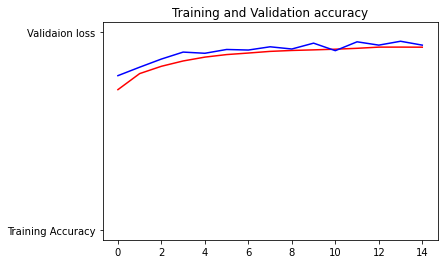

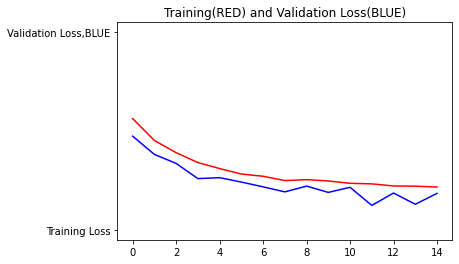

In [22]:
# PLOT LOSS AND ACCURACY
%matplotlib inline
import matplotlib.image as img
import matplotlib.pyplot as plt
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc= history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc)) # Get number of epochs


#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', 'Validaion loss')
plt.title('Training and Validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', 'Training Loss')
plt.plot(epochs, val_loss, 'b', 'Validation Loss')
plt.title('Training(RED) and Validation Loss(BLUE)')

In [23]:
 # You should be able to upload an image here 
# and have it classified

import numpy as np
from google.colab import files
from keras.preprocessing import image


uploaded = files.upload()

for fn in uploaded.keys():

   # predicting images
   path = '/content/' + fn
   img = image.load_img(path, target_size = (150,150,3))
   x = image.img_to_array(img)
   x =np.expand_dims(x, axis = 0)

   images = np.vstack([x])
   classes = model.predict(images, batch_size = 10)
   print(classes[0])

   if classes[0] > 0.5:
     print(fn + 'is a dog')
   else:
     print(fn + 'is a cat')

Saving cat.jfif to cat.jfif
[0.]
cat.jfifis a cat
